In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sample_4months.csv')

In [3]:
df.shape

(150792, 148)

In [4]:
dft = df.copy()

In [5]:
dft.shape

(150792, 148)

In [6]:
#dff = pd.DataFrame({'cols':['cols_not_dropping_in_null', 'cols_dropping_in_null' , 'cols_not_null_not_dropping', 'cols_not_null_dropping'], 'Numbers':[30,32,61,13]})
##dff

In [7]:
#dff.plot(kind='bar')

In [8]:
df['loan_status'].value_counts()

Current               120335
Fully Paid             21157
Charged Off             4844
Late (31-120 days)      2930
In Grace Period         1011
Late (16-30 days)        510
Default                    5
Name: loan_status, dtype: int64

### Convert the target variable to binary classification Problem

In [9]:
replace_map = {'loan_status': {'Current': 0, 'Fully Paid': 0, 'Charged Off': 1, 'Late (31-120 days)': 1,
                                  'In Grace Period': 1, 'Late (16-30 days)': 1, 'Default': 1}}
df.replace(replace_map, inplace=True)

In [10]:
dft.replace(replace_map, inplace=True)

In [11]:
df['loan_status'].value_counts()

0    141492
1      9300
Name: loan_status, dtype: int64

### Bivariate Classication and Statistacal Test Results 

In [12]:
from scipy.stats import chi2_contingency

In [13]:
def analyze_bivariate_cat_cat(x):
    print("Statistical test used: Chi_2 contingency")
    table = pd.crosstab(df[x],df['loan_status'])
    observed_value= table.values
    hypo_test =chi2_contingency(observed=observed_value)
    print("pvalue:", hypo_test[1])
    if hypo_test[1]>0.05:
        print("The attribute:",x,"is independent on loan_status")
    else:
        print("The attributes:",x,"is dependent on loan_status")
        
    print("")
    print("BIVARIATE PLOTS: loan_status Vs",x)
    pd.crosstab(df[x],df['loan_status']).plot(kind='bar')
    plt.show()
    #dff = df.loc[:,['loan_status',x]]
    #dff = pd.get_dummies(dff, drop_first=True)
    #sns.heatmap(dff.corr(), annot=True)
    #plt.show()
    

Statistical test used: Chi_2 contingency
pvalue: 2.767841034268479e-17
The attributes: initial_list_status is dependent on loan_status

BIVARIATE PLOTS: loan_status Vs initial_list_status


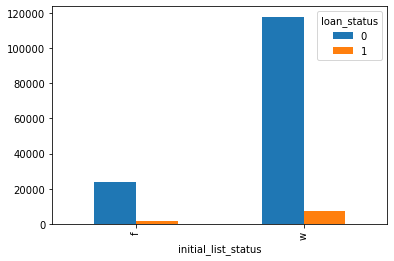

In [14]:
analyze_bivariate_cat_cat('initial_list_status')

In [15]:
 def analyze_bivariate_num_cat(x,y):
    print("Before Transformation")
    f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_dist)
    plt.axvline(x.mean(), color='r')
    plt.axvline(x.median(),color='g')
    plt.show()
    print("Before Transformation Skewness:",x.skew())
    print("")
    print("Checking for skewness with different transformation techniques")
    print('sqrt:',np.sqrt(x).skew())
    print('cube root:',np.cbrt(x).skew())
    #try:
    #    print('log:',np.log(x).skew())
    #except ZeroDivisionError:
    #      print("The log transformation raised an error")
        
    
    fitted_data2, fitted_lambda2 = stats.yeojohnson(x)
    fitted_data2 = pd.Series(fitted_data2)
    print('yeo-jhonson:',pd.Series(fitted_data2).skew())
    #try:
    #    fitted_data1, fitted_lambda1 = stats.boxcox(x)
    #    print('boxcox:',fitted_data1.skew())
    #except:
    #    raise ValueError('The boxcox tranformation raised an errro')

    print("")
    print("After Transformation")
    f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(fitted_data2,ax=ax_box)
    sns.distplot(fitted_data2,ax=ax_dist)
    plt.axvline(fitted_data2.mean(), color='r')
    plt.axvline(fitted_data2.median(),color='g')
    plt.show()
    print("After Transformation Skewness:",fitted_data2.skew())
    print("The lambda value is",fitted_lambda2)
    
    #dft[y] = 
    dft[y] = pd.Series(fitted_data2)
    print("Bivariate Analysis")
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    sns.boxplot(x='loan_status',y=fitted_data2,data=dft,whis=2.5)
    plt.title('with transformation')
    plt.subplot(2,2,2)
    sns.boxplot(x='loan_status',y=x,data=df)
    plt.title('without transformation')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,3)
    sns.violinplot(x='loan_status',y=fitted_data2,data=dft)
    plt.title('with transformation')
    plt.subplot(2,2,4)
    sns.violinplot(x='loan_status',y=x,data=df)
    plt.title('without transformation')
    plt.show()
    
    print("")
    print("Correlation:")
    print('with transformation:')
    print(dft[['loan_status',y]].corr())
    print('without transformation:')
    print(df[['loan_status',y]].corr())
    
    print("")
    print("Statiscal Test:")
    print("Without Transformation")
    a = df[df['loan_status']==0][y]
    b = df[df['loan_status']==1][y]
    print(stats.kruskal(a,b))
    print(stats.mannwhitneyu(a,b,alternative='two-sided'))
    
    #dft[y] = stats.yeojohnson(x)    
    print("With Transformation")
    #df.reset_index(inplace=True)
    #df1.reset_index(inplace=True)
    #print(len(df1[y]))
    #dft[y]=stats.yeojohnson(x)
    c = dft[dft['loan_status']==0][y]
    d = dft[dft['loan_status']==1][y]
    #print(stats.f_oneway(c,d))
    #print(stats.ttest_ind(c,d))
    print(stats.kruskal(c,d))
    print(stats.mannwhitneyu(c,d,alternative='two-sided'))

Before Transformation


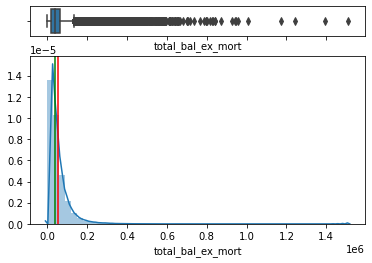

Before Transformation Skewness: 3.7351105377447285

Checking for skewness with different transformation techniques
sqrt: 1.035375299016381
cube root: 0.36294547885117145
yeo-jhonson: 0.07770276699594238

After Transformation


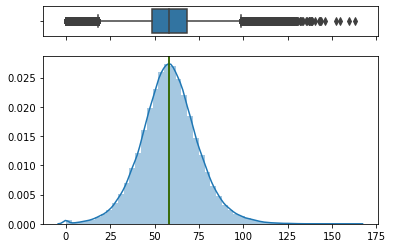

After Transformation Skewness: 0.07770276699594238
The lambda value is 0.2666459858796582
Bivariate Analysis


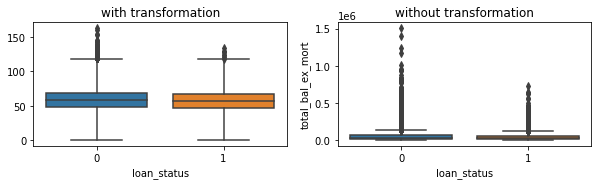

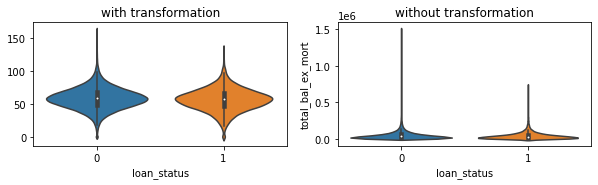


Correlation:
with transformation:
                   loan_status  total_bal_ex_mort
loan_status           1.000000          -0.027253
total_bal_ex_mort    -0.027253           1.000000
without transformation:
                   loan_status  total_bal_ex_mort
loan_status           1.000000          -0.017672
total_bal_ex_mort    -0.017672           1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=88.10204458287797, pvalue=6.2163339778842326e-21)
MannwhitneyuResult(statistic=696105885.5, pvalue=6.216341231918329e-21)
With Transformation
KruskalResult(statistic=88.10204458287797, pvalue=6.2163339778842326e-21)
MannwhitneyuResult(statistic=696105885.5, pvalue=6.216341231918329e-21)


In [16]:
analyze_bivariate_num_cat(df['total_bal_ex_mort'],'total_bal_ex_mort')

### Following the same index as excel sheet:Variable_Analysis: cols not null not dropping

### Attribute/Column_2: loan_amnt

Before Transformation


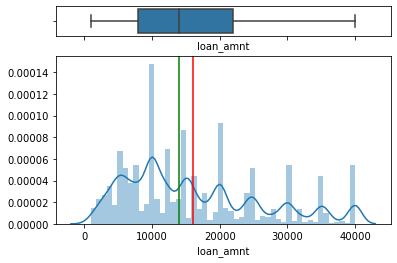

Before Transformation Skewness: 0.7519410576240981

Checking for skewness with different transformation techniques
sqrt: 0.18578861476179828
cube root: -0.04723044204996202
yeo-jhonson: -0.05087698868027731

After Transformation


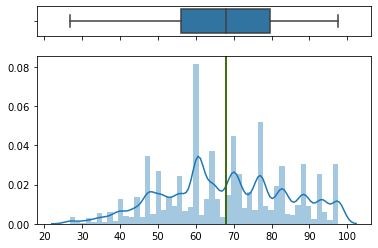

After Transformation Skewness: -0.05087698868027731
The lambda value is 0.33080602049219543
Bivariate Analysis


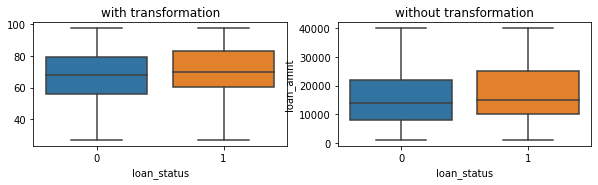

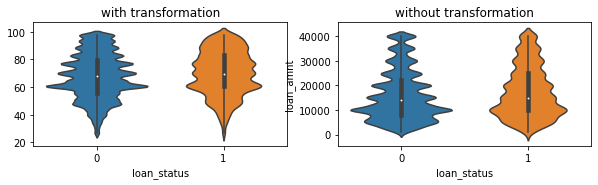


Correlation:
with transformation:
             loan_status  loan_amnt
loan_status      1.00000    0.03496
loan_amnt        0.03496    1.00000
without transformation:
             loan_status  loan_amnt
loan_status     1.000000   0.033681
loan_amnt       0.033681   1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=186.92181713139365, pvalue=1.4936886574290454e-42)
MannwhitneyuResult(statistic=602407324.0, pvalue=1.4936911847018637e-42)
With Transformation
KruskalResult(statistic=186.92181713139365, pvalue=1.4936886574290454e-42)
MannwhitneyuResult(statistic=602407324.0, pvalue=1.4936911847018637e-42)


In [17]:
analyze_bivariate_num_cat(df['loan_amnt'],'loan_amnt')

In [ ]:
#should we take parametric statical test after transformation because the non-parametric statical results are same with or without transformation 

### Attribute/Column_3: term

Statistical test used: Chi_2 contingency
pvalue: 9.173594041357175e-84
The attributes: term is dependent on loan_status

BIVARIATE PLOTS: loan_status Vs term


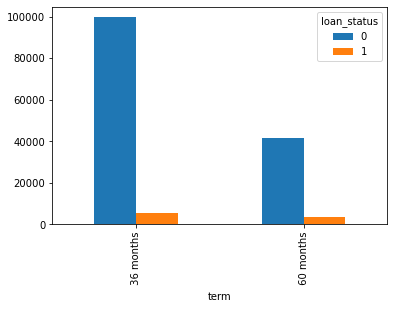

In [18]:
analyze_bivariate_cat_cat('term')

### Attribute/Column_4: int_rate

Before Transformation


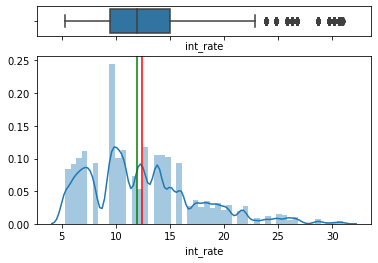

Before Transformation Skewness: 0.8606157071452561

Checking for skewness with different transformation techniques
sqrt: 0.39793310424767747
cube root: 0.2507473019625915
yeo-jhonson: 0.003127800397230081

After Transformation


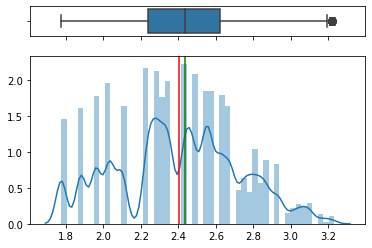

After Transformation Skewness: 0.003127800397230081
The lambda value is -0.0409033663604852
Bivariate Analysis


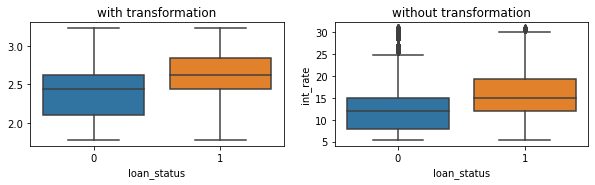

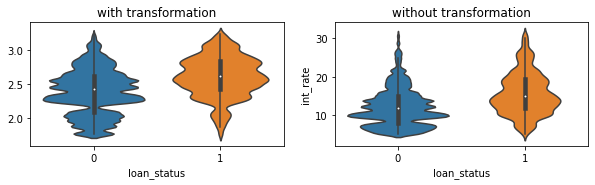


Correlation:
with transformation:
             loan_status  int_rate
loan_status     1.000000  0.160543
int_rate        0.160543  1.000000
without transformation:
             loan_status  int_rate
loan_status     1.000000  0.166079
int_rate        0.166079  1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=3812.2634568853673, pvalue=0.0)
MannwhitneyuResult(statistic=406954641.0, pvalue=0.0)
With Transformation
KruskalResult(statistic=3812.2634568853673, pvalue=0.0)
MannwhitneyuResult(statistic=406954641.0, pvalue=0.0)


In [19]:
analyze_bivariate_num_cat(df['int_rate'],'int_rate')

### Attribute/Column_5: installment

Before Transformation


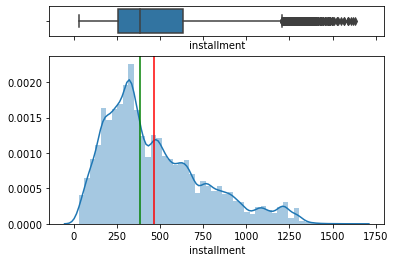

Before Transformation Skewness: 0.9283743045688089

Checking for skewness with different transformation techniques
sqrt: 0.29273008160369485
cube root: 0.0410968961321425
yeo-jhonson: -0.025161743165959698

After Transformation


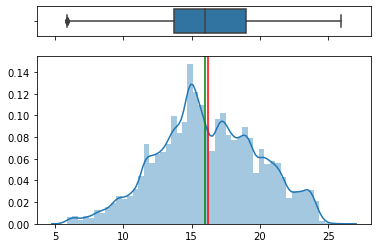

After Transformation Skewness: -0.025161743165959698
The lambda value is 0.2896625505252188
Bivariate Analysis


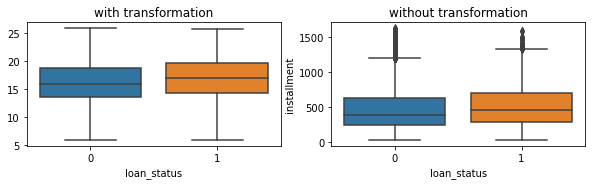

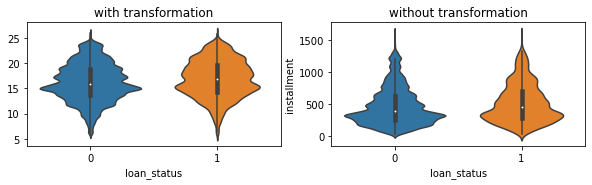


Correlation:
with transformation:
             loan_status  installment
loan_status     1.000000     0.045539
installment     0.045539     1.000000
without transformation:
             loan_status  installment
loan_status     1.000000     0.044502
installment     0.044502     1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=319.91168433330023, pvalue=1.5140433600490067e-71)
MannwhitneyuResult(statistic=585206353.0, pvalue=1.5140467001587326e-71)
With Transformation
KruskalResult(statistic=319.91168433330023, pvalue=1.5140433600490067e-71)
MannwhitneyuResult(statistic=585206353.0, pvalue=1.5140467001587326e-71)


In [20]:
analyze_bivariate_num_cat(df['installment'],'installment')

### Attribute/Column_6: sub_grade

Statistical test used: Chi_2 contingency
pvalue: 0.0
The attributes: sub_grade is dependent on loan_status

BIVARIATE PLOTS: loan_status Vs sub_grade


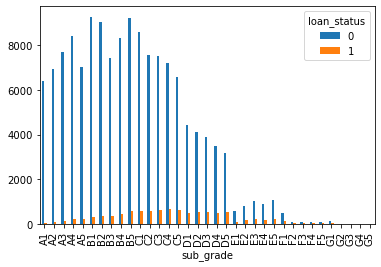

In [21]:
analyze_bivariate_cat_cat('sub_grade')

### Attribute/Column_7: home_ownership

Statistical test used: Chi_2 contingency
pvalue: 3.2860861002583384e-56
The attributes: home_ownership is dependent on loan_status

BIVARIATE PLOTS: loan_status Vs home_ownership


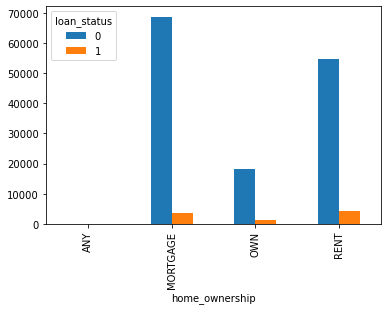

In [22]:
analyze_bivariate_cat_cat('home_ownership')

### Attribute/Column_8: annual_inc

Before Transformation


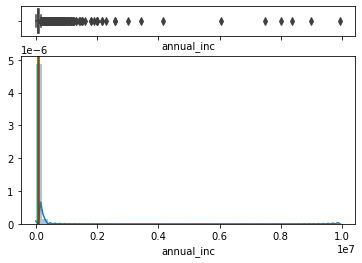

Before Transformation Skewness: 48.017853354712095

Checking for skewness with different transformation techniques
sqrt: 2.7129861840601417
cube root: 0.9254455418984802
yeo-jhonson: 0.4281052246390089

After Transformation


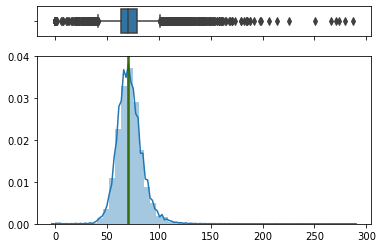

After Transformation Skewness: 0.4281052246390089
The lambda value is 0.271010461988467
Bivariate Analysis


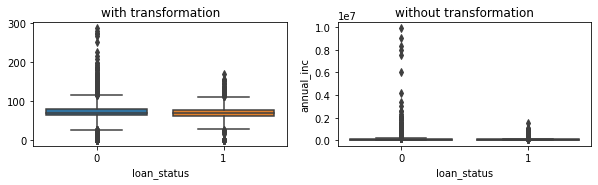

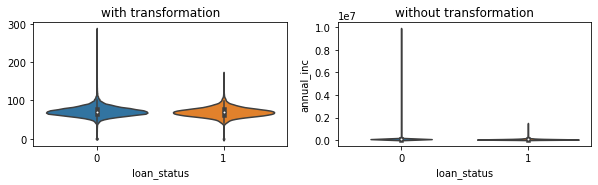


Correlation:
with transformation:
             loan_status  annual_inc
loan_status     1.000000   -0.034629
annual_inc     -0.034629    1.000000
without transformation:
             loan_status  annual_inc
loan_status     1.000000   -0.020895
annual_inc     -0.020895    1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=204.16540408157923, pvalue=2.575686846725997e-46)
MannwhitneyuResult(statistic=716033297.0, pvalue=2.575691394495958e-46)
With Transformation
KruskalResult(statistic=204.16540408157923, pvalue=2.575686846725997e-46)
MannwhitneyuResult(statistic=716033297.0, pvalue=2.575691394495958e-46)


In [23]:
analyze_bivariate_num_cat(df['annual_inc'],'annual_inc')

### Attribute/Column_9: verification_status

Statistical test used: Chi_2 contingency
pvalue: 3.180768119476311e-160
The attributes: verification_status is dependent on loan_status

BIVARIATE PLOTS: loan_status Vs verification_status


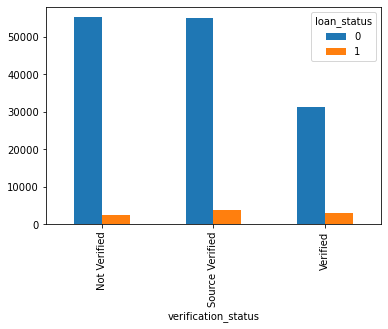

In [24]:
analyze_bivariate_cat_cat('verification_status')

### Attribute/Column_10: purpose

Statistical test used: Chi_2 contingency
pvalue: 3.901419983789543e-67
The attributes: purpose is dependent on loan_status

BIVARIATE PLOTS: loan_status Vs purpose


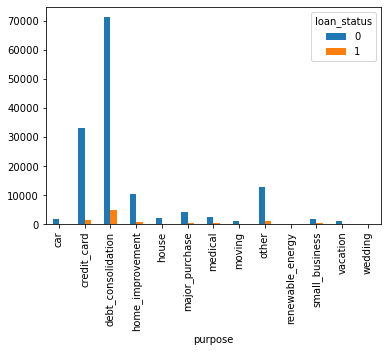

In [25]:
analyze_bivariate_cat_cat('purpose')

### Attribute/Column_13: open_acc

Before Transformation


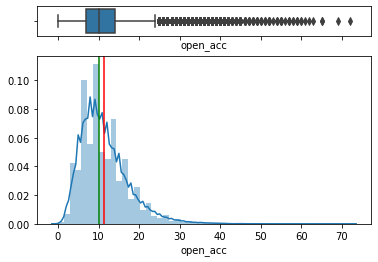

Before Transformation Skewness: 1.2877440901683987

Checking for skewness with different transformation techniques
sqrt: 0.42012553359561544
cube root: 0.13347920218963832
yeo-jhonson: 0.0018491031706037208

After Transformation


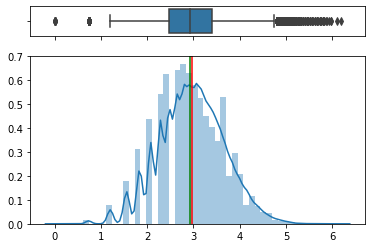

After Transformation Skewness: 0.0018491031706037208
The lambda value is 0.16073201587673158
Bivariate Analysis


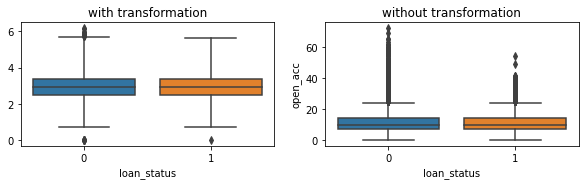

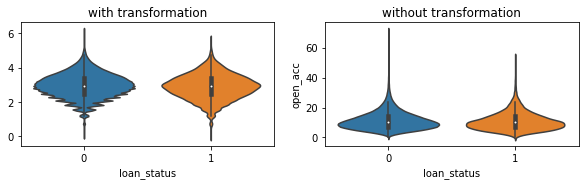


Correlation:
with transformation:
             loan_status  open_acc
loan_status      1.00000  -0.02583
open_acc        -0.02583   1.00000
without transformation:
             loan_status  open_acc
loan_status     1.000000 -0.021638
open_acc       -0.021638  1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=83.77534845031708, pvalue=5.543172839545963e-20)
MannwhitneyuResult(statistic=695088616.0, pvalue=5.543179162290712e-20)
With Transformation
KruskalResult(statistic=83.77534845031708, pvalue=5.543172839545963e-20)
MannwhitneyuResult(statistic=695088616.0, pvalue=5.543179162290712e-20)


In [26]:
analyze_bivariate_num_cat(df['open_acc'],'open_acc')

### Column/Attribute_ 15 : revol_bal

Before Transformation


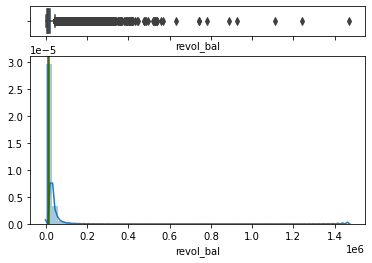

Before Transformation Skewness: 10.813290957250771

Checking for skewness with different transformation techniques
sqrt: 1.7231672055062
cube root: 0.5480844248206636
yeo-jhonson: 0.1481401487985833

After Transformation


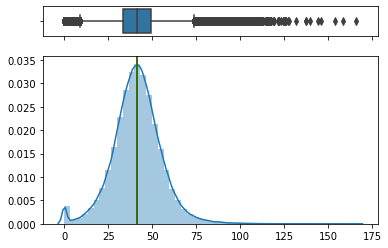

After Transformation Skewness: 0.1481401487985833
The lambda value is 0.26913543122390887
Bivariate Analysis


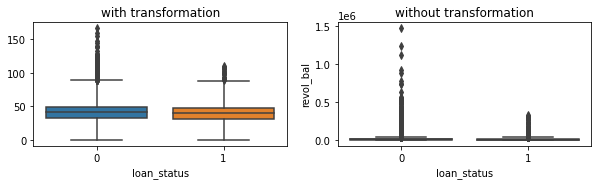

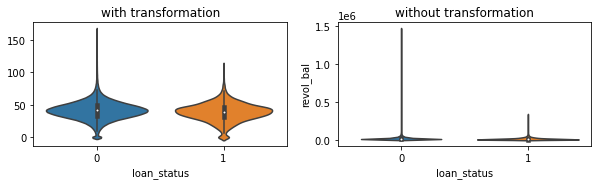


Correlation:
with transformation:
             loan_status  revol_bal
loan_status     1.000000  -0.040976
revol_bal      -0.040976   1.000000
without transformation:
             loan_status  revol_bal
loan_status     1.000000  -0.025605
revol_bal      -0.025605   1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=218.42818374102092, pvalue=1.9917841233640412e-49)
MannwhitneyuResult(statistic=718035991.5, pvalue=1.9917877593440524e-49)
With Transformation
KruskalResult(statistic=218.42818374102092, pvalue=1.9917841233640412e-49)
MannwhitneyuResult(statistic=718035991.5, pvalue=1.9917877593440524e-49)


In [27]:
analyze_bivariate_num_cat(df['revol_bal'],'revol_bal')

### Column/Attribute_ 16 : total_acc

Before Transformation


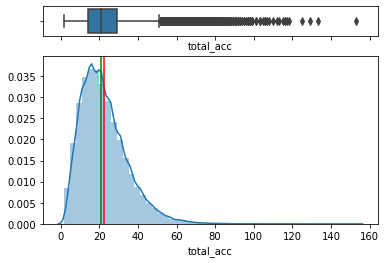

Before Transformation Skewness: 1.1147427488437012

Checking for skewness with different transformation techniques
sqrt: 0.29121451674173293
cube root: 0.022299668332176052
yeo-jhonson: -0.0059847327604827145

After Transformation


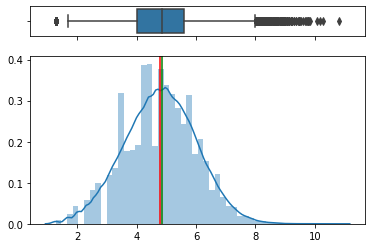

After Transformation Skewness: -0.0059847327604827145
The lambda value is 0.27299379386299644
Bivariate Analysis


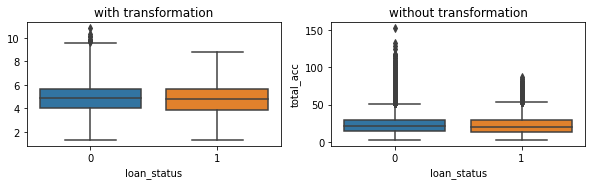

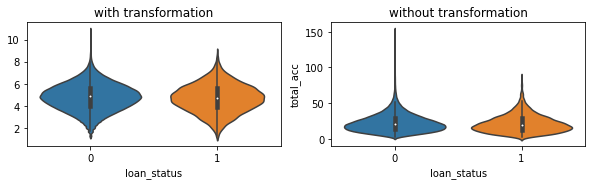


Correlation:
with transformation:
             loan_status  total_acc
loan_status     1.000000  -0.023123
total_acc      -0.023123   1.000000
without transformation:
             loan_status  total_acc
loan_status     1.000000  -0.017943
total_acc      -0.017943   1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=70.70148073929691, pvalue=4.1558043248323937e-17)
MannwhitneyuResult(statistic=692115837.5, pvalue=4.155808682418845e-17)
With Transformation
KruskalResult(statistic=70.70148073929691, pvalue=4.1558043248323937e-17)
MannwhitneyuResult(statistic=692115837.5, pvalue=4.155808682418845e-17)


In [28]:
analyze_bivariate_num_cat(df['total_acc'] ,'total_acc' )

### Column/Attribute_ 17 : initial_list_status

Statistical test used: Chi_2 contingency
pvalue: 2.767841034268479e-17
The attributes: initial_list_status is dependent on loan_status

BIVARIATE PLOTS: loan_status Vs initial_list_status


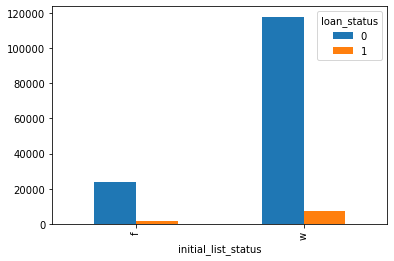

In [29]:
analyze_bivariate_cat_cat('initial_list_status')

### Column/Attribute_ 18 : out_prncp

Before Transformation


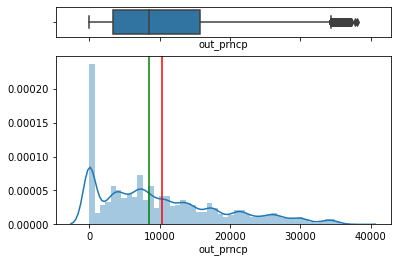

Before Transformation Skewness: 0.7910333507452744

Checking for skewness with different transformation techniques
sqrt: -0.2659116821623469
cube root: -0.814183228246523
yeo-jhonson: -0.6948059060321771

After Transformation


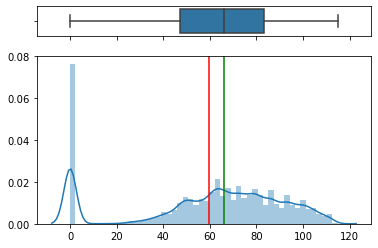

After Transformation Skewness: -0.6948059060321771
The lambda value is 0.3535420813031564
Bivariate Analysis


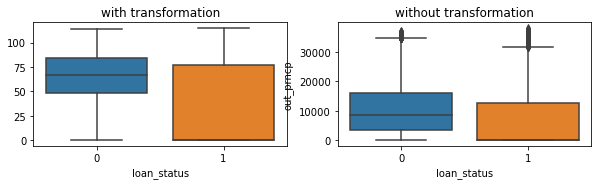

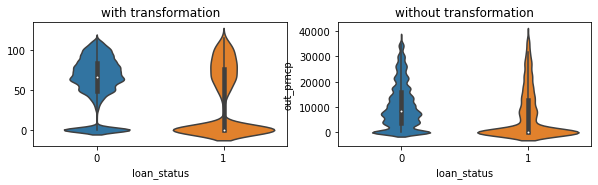


Correlation:
with transformation:
             loan_status  out_prncp
loan_status      1.00000   -0.17821
out_prncp       -0.17821    1.00000
without transformation:
             loan_status  out_prncp
loan_status     1.000000  -0.094523
out_prncp      -0.094523   1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=2470.0670575566833, pvalue=0.0)
MannwhitneyuResult(statistic=859491632.0, pvalue=0.0)
With Transformation
KruskalResult(statistic=2470.0670575566833, pvalue=0.0)
MannwhitneyuResult(statistic=859491632.0, pvalue=0.0)


In [30]:
analyze_bivariate_num_cat(df['out_prncp'] ,'out_prncp')

### Column/Attribute_ 19 : total_pymnt

Before Transformation


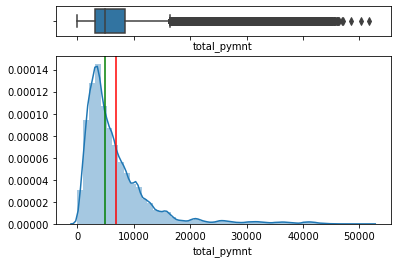

Before Transformation Skewness: 2.735106894842325

Checking for skewness with different transformation techniques
sqrt: 1.2686791704876492
cube root: 0.7751073498551139
yeo-jhonson: 0.07044634650376867

After Transformation


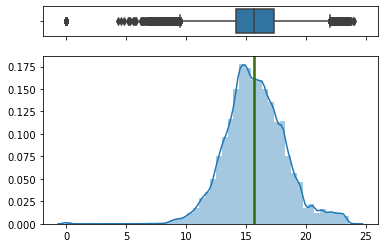

After Transformation Skewness: 0.07044634650376867
The lambda value is 0.13139471081970927
Bivariate Analysis


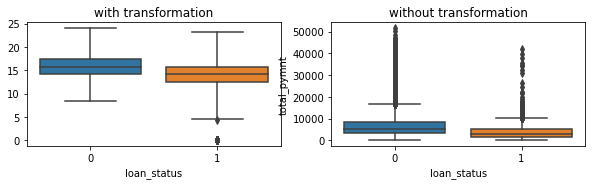

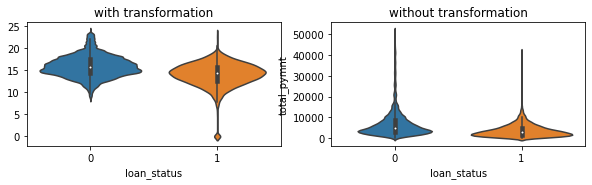


Correlation:
with transformation:
             loan_status  total_pymnt
loan_status     1.000000    -0.185847
total_pymnt    -0.185847     1.000000
without transformation:
             loan_status  total_pymnt
loan_status     1.000000    -0.122926
total_pymnt    -0.122926     1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=4000.082537681723, pvalue=0.0)
MannwhitneyuResult(statistic=915120563.0, pvalue=0.0)
With Transformation
KruskalResult(statistic=4000.082537681723, pvalue=0.0)
MannwhitneyuResult(statistic=915120563.0, pvalue=0.0)


In [31]:
analyze_bivariate_num_cat(df['total_pymnt'] ,'total_pymnt')

### Column/Attribute_ 20 : total_rec_prncp

Before Transformation


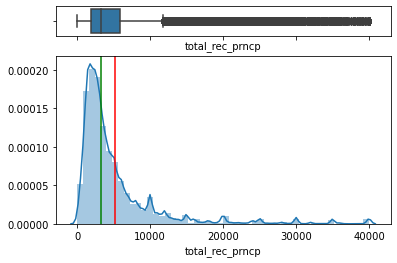

Before Transformation Skewness: 3.105578474147294

Checking for skewness with different transformation techniques
sqrt: 1.632692828909929
cube root: 1.1013656924792108
yeo-jhonson: 0.08928834030796336

After Transformation


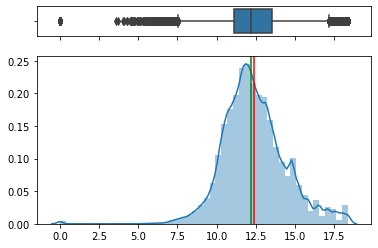

After Transformation Skewness: 0.08928834030796336
The lambda value is 0.0958991067595747
Bivariate Analysis


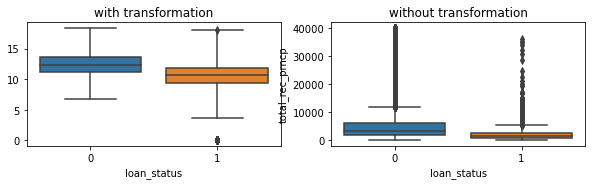

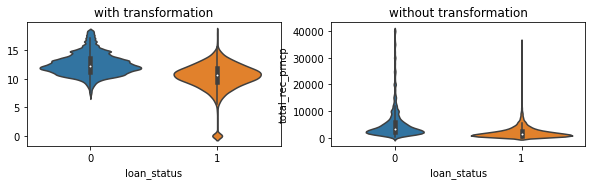


Correlation:
with transformation:
                 loan_status  total_rec_prncp
loan_status         1.000000        -0.259749
total_rec_prncp    -0.259749         1.000000
without transformation:
                 loan_status  total_rec_prncp
loan_status         1.000000        -0.133207
total_rec_prncp    -0.133207         1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=7544.7359983119995, pvalue=0.0)
MannwhitneyuResult(statistic=1011143948.5, pvalue=0.0)
With Transformation
KruskalResult(statistic=7544.7359983119995, pvalue=0.0)
MannwhitneyuResult(statistic=1011143948.5, pvalue=0.0)


In [32]:
analyze_bivariate_num_cat( df['total_rec_prncp'],'total_rec_prncp')

### Column/Attribute_ 21 : total_rec_int

Before Transformation


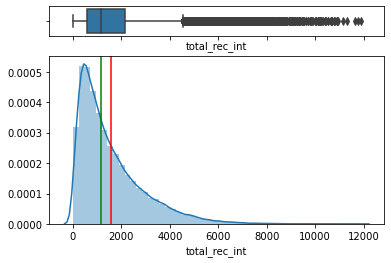

Before Transformation Skewness: 1.547304417951791

Checking for skewness with different transformation techniques
sqrt: 0.5047707965883497
cube root: 0.07695092368783853
yeo-jhonson: -0.007835539366547047

After Transformation


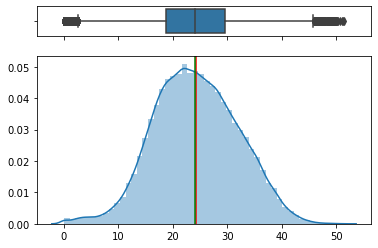

After Transformation Skewness: -0.007835539366547047
The lambda value is 0.2974984757570249
Bivariate Analysis


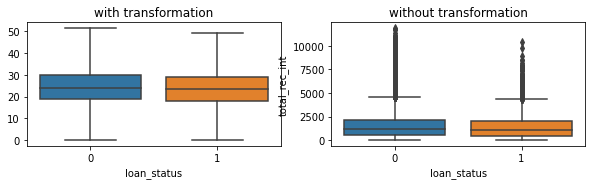

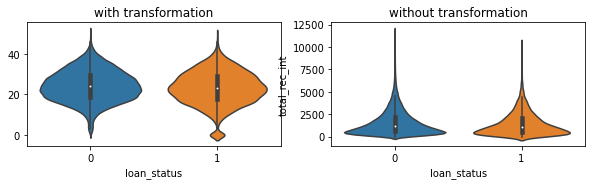


Correlation:
with transformation:
               loan_status  total_rec_int
loan_status       1.000000      -0.034539
total_rec_int    -0.034539       1.000000
without transformation:
               loan_status  total_rec_int
loan_status       1.000000      -0.024027
total_rec_int    -0.024027       1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=108.52916817196677, pvalue=2.057993497865541e-25)
MannwhitneyuResult(statistic=700300206.0, pvalue=2.0579961579687833e-25)
With Transformation
KruskalResult(statistic=108.52916817196677, pvalue=2.057993497865541e-25)
MannwhitneyuResult(statistic=700300206.0, pvalue=2.0579961579687833e-25)


In [33]:
analyze_bivariate_num_cat( df['total_rec_int'],'total_rec_int')

### Column/Attribute_ 22 : total_rec_late_fee

In [34]:
#ordinal 

### Column/Attribute_ 23 : last_pymnt_amnt

Before Transformation


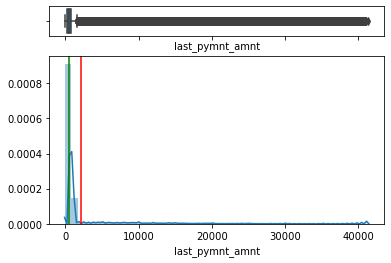

Before Transformation Skewness: 4.07013063240359

Checking for skewness with different transformation techniques
sqrt: 2.864188361233291
cube root: 2.3971211887873176
yeo-jhonson: -0.21064158993302295

After Transformation


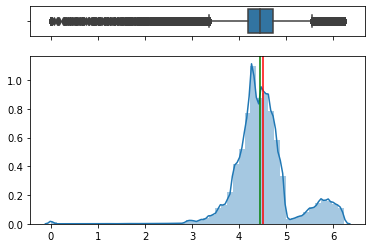

After Transformation Skewness: -0.21064158993302295
The lambda value is -0.1111924394113216
Bivariate Analysis


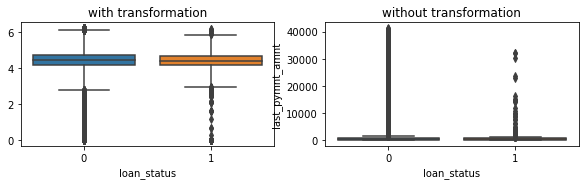

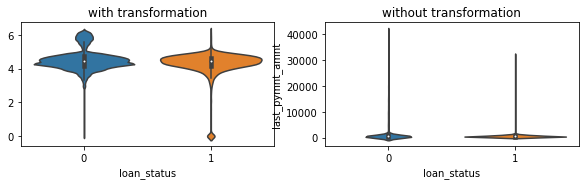


Correlation:
with transformation:
                 loan_status  last_pymnt_amnt
loan_status         1.000000        -0.089458
last_pymnt_amnt    -0.089458         1.000000
without transformation:
                 loan_status  last_pymnt_amnt
loan_status         1.000000        -0.073529
last_pymnt_amnt    -0.073529         1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=151.5928244850086, pvalue=7.777106679713412e-35)
MannwhitneyuResult(statistic=708004225.0, pvalue=7.777118530061579e-35)
With Transformation
KruskalResult(statistic=151.5928244850086, pvalue=7.777106679713412e-35)
MannwhitneyuResult(statistic=708004225.0, pvalue=7.777118530061579e-35)


In [35]:
analyze_bivariate_num_cat( df['last_pymnt_amnt'] ,'last_pymnt_amnt' )

### Column/Attribute_ 24 : application_type

Statistical test used: Chi_2 contingency
pvalue: 8.370505449357992e-16
The attributes: application_type is dependent on loan_status

BIVARIATE PLOTS: loan_status Vs application_type


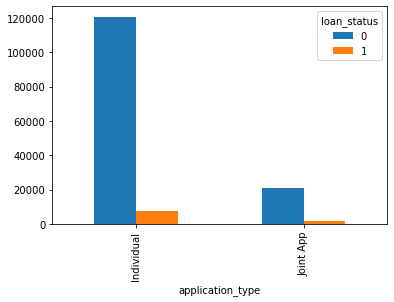

In [36]:
analyze_bivariate_cat_cat('application_type')

### Column/Attribute_ 25 : tot_coll_amt

In [37]:
#ordinal 

### Column/Attribute_ 26 : tot_cur_bal

Before Transformation


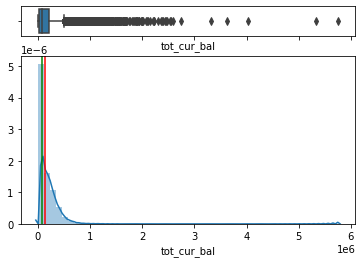

Before Transformation Skewness: 2.9720211436561863

Checking for skewness with different transformation techniques
sqrt: 0.7894056217505692
cube root: 0.3642044149194348
yeo-jhonson: -0.03676991222350516

After Transformation


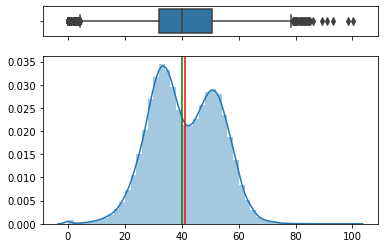

After Transformation Skewness: -0.03676991222350516
The lambda value is 0.19368406476975672
Bivariate Analysis


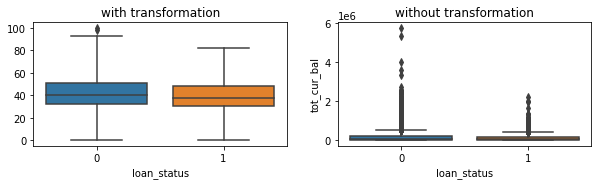

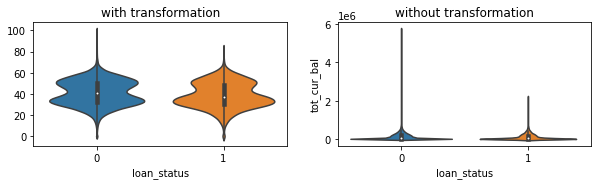


Correlation:
with transformation:
             loan_status  tot_cur_bal
loan_status     1.000000    -0.046129
tot_cur_bal    -0.046129     1.000000
without transformation:
             loan_status  tot_cur_bal
loan_status     1.000000    -0.035043
tot_cur_bal    -0.035043     1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=295.53453712075617, pvalue=3.095061661301409e-66)
MannwhitneyuResult(statistic=727843325.5, pvalue=3.0950682257585345e-66)
With Transformation
KruskalResult(statistic=295.53453712075617, pvalue=3.095061661301409e-66)
MannwhitneyuResult(statistic=727843325.5, pvalue=3.0950682257585345e-66)


In [38]:
analyze_bivariate_num_cat(df['tot_cur_bal'],'tot_cur_bal')

### Column/Attribute_ 27 : open_acc_6m

In [39]:
#Ordinal

### Column/Attribute_ 28 : open_act_il

In [40]:
#Ordinal

### Column/Attribute_ 29 : open_il_12m

In [41]:
#Ordinal

### Column/Attribute_ 30 : open_il_24m

In [42]:
#Ordinal

### Column/Attribute_ 31 : total_bal_il

Before Transformation


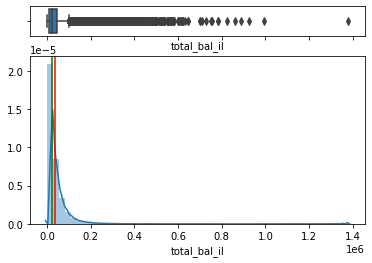

Before Transformation Skewness: 3.9814696374522

Checking for skewness with different transformation techniques
sqrt: 0.7699311775138141
cube root: -0.21605522331511764
yeo-jhonson: -0.38509109603163755

After Transformation


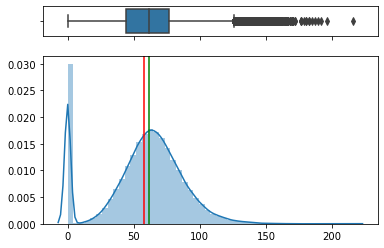

After Transformation Skewness: -0.38509109603163755
The lambda value is 0.2948839835961251
Bivariate Analysis


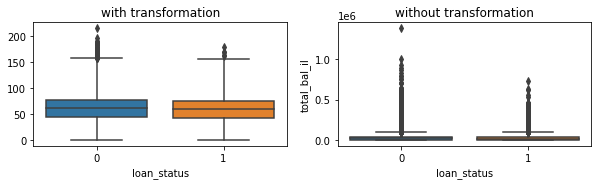

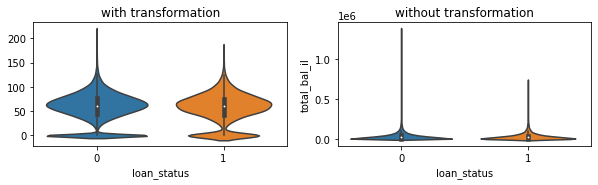


Correlation:
with transformation:
              loan_status  total_bal_il
loan_status      1.000000     -0.013444
total_bal_il    -0.013444      1.000000
without transformation:
              loan_status  total_bal_il
loan_status      1.000000     -0.006593
total_bal_il    -0.006593      1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=19.04021296397815, pvalue=1.2799252693370905e-05)
MannwhitneyuResult(statistic=675662293.5, pvalue=1.2799259898749588e-05)
With Transformation
KruskalResult(statistic=19.04021296397815, pvalue=1.2799252693370905e-05)
MannwhitneyuResult(statistic=675662293.5, pvalue=1.2799259898749588e-05)


In [43]:
analyze_bivariate_num_cat( df['total_bal_il'],'total_bal_il')

### Column/Attribute_ 32 : open_rv_12m

In [44]:
#ordinal

### Column/Attribute_ 33 :

In [45]:
#ordinal

### Column/Attribute_ 34 : max_bal_bc

Before Transformation


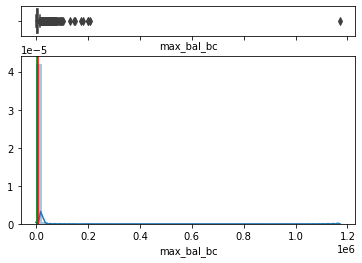

Before Transformation Skewness: 43.28178620143812

Checking for skewness with different transformation techniques
sqrt: 0.6789271519155933
cube root: -0.33699932460803006
yeo-jhonson: -0.02506107647267042

After Transformation


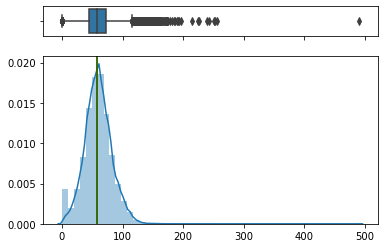

After Transformation Skewness: -0.02506107647267042
The lambda value is 0.373110262707397
Bivariate Analysis


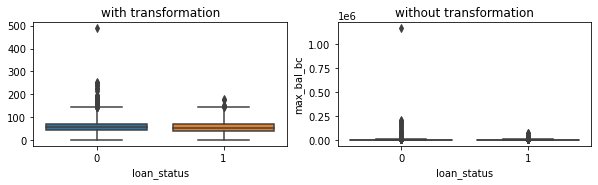

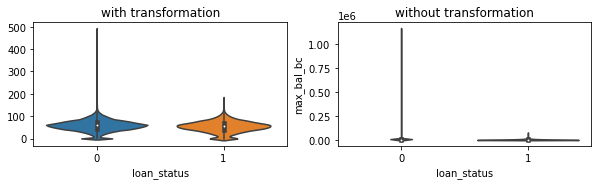


Correlation:
with transformation:
             loan_status  max_bal_bc
loan_status     1.000000   -0.046388
max_bal_bc     -0.046388    1.000000
without transformation:
             loan_status  max_bal_bc
loan_status     1.000000   -0.033557
max_bal_bc     -0.033557    1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=298.4691370553648, pvalue=7.100642433031007e-67)
MannwhitneyuResult(statistic=728188191.0, pvalue=7.10065756703701e-67)
With Transformation
KruskalResult(statistic=298.4691370553648, pvalue=7.100642433031007e-67)
MannwhitneyuResult(statistic=728188191.0, pvalue=7.10065756703701e-67)


In [46]:
analyze_bivariate_num_cat(df['max_bal_bc'],'max_bal_bc')

### Column/Attribute_ 35 : total_rev_hi_lim

Before Transformation


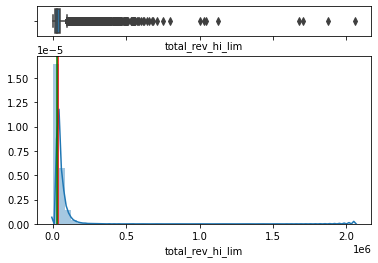

Before Transformation Skewness: 6.686011257317964

Checking for skewness with different transformation techniques
sqrt: 1.2316267150676372
cube root: 0.5583760689149981
yeo-jhonson: 0.08822013874035275

After Transformation


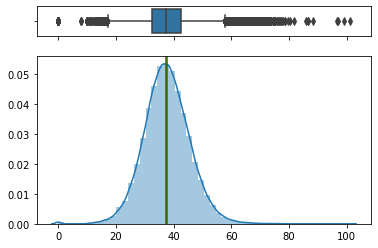

After Transformation Skewness: 0.08822013874035275
The lambda value is 0.21477028034119405
Bivariate Analysis


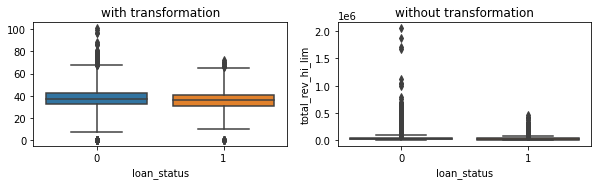

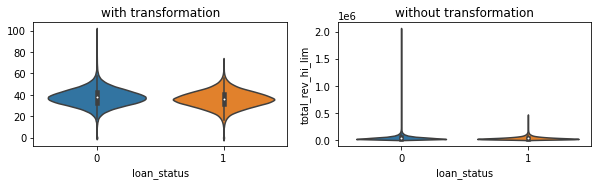


Correlation:
with transformation:
                  loan_status  total_rev_hi_lim
loan_status          1.000000         -0.052677
total_rev_hi_lim    -0.052677          1.000000
without transformation:
                  loan_status  total_rev_hi_lim
loan_status          1.000000         -0.041923
total_rev_hi_lim    -0.041923          1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=397.8211088840187, pvalue=1.641553559485021e-88)
MannwhitneyuResult(statistic=739043385.5, pvalue=1.641557595439989e-88)
With Transformation
KruskalResult(statistic=397.8211088840187, pvalue=1.641553559485021e-88)
MannwhitneyuResult(statistic=739043385.5, pvalue=1.641557595439989e-88)


In [47]:
analyze_bivariate_num_cat(df['total_rev_hi_lim'],'total_rev_hi_lim')

### Column/Attribute_ 36 : inq_fi

In [48]:
#ordinal

### Column/Attribute_ 37 : total_cu_tl

In [49]:
#ordinal

### Column/Attribute_ 38 : inq_last_12m

In [50]:
# ordinal

### Column/Attribute_ 39 : acc_open_past_24mths

Before Transformation


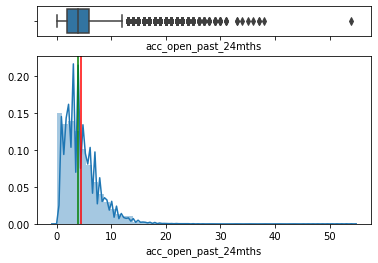

Before Transformation Skewness: 1.455031497314827

Checking for skewness with different transformation techniques
sqrt: -0.12326381293030807
cube root: -1.1037177597935623
yeo-jhonson: -0.006288317122952956

After Transformation


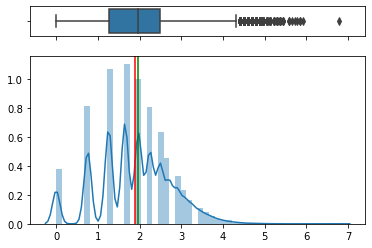

After Transformation Skewness: -0.006288317122952956
The lambda value is 0.24301794012550157
Bivariate Analysis


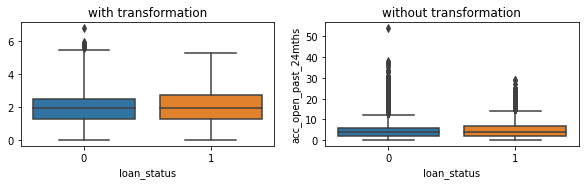

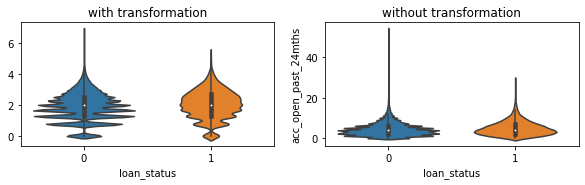


Correlation:
with transformation:
                      loan_status  acc_open_past_24mths
loan_status              1.000000              0.040338
acc_open_past_24mths     0.040338              1.000000
without transformation:
                      loan_status  acc_open_past_24mths
loan_status              1.000000              0.041239
acc_open_past_24mths     0.041239              1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=255.38412568715768, pvalue=1.7406065623869747e-57)
MannwhitneyuResult(statistic=593373065.0, pvalue=1.740610018212075e-57)
With Transformation
KruskalResult(statistic=255.38412568715768, pvalue=1.7406065623869747e-57)
MannwhitneyuResult(statistic=593373065.0, pvalue=1.740610018212075e-57)


In [51]:
analyze_bivariate_num_cat(df['acc_open_past_24mths'] ,'acc_open_past_24mths')

### Column/Attribute_ 40 : mo_sin_old_rev_tl_op

Before Transformation


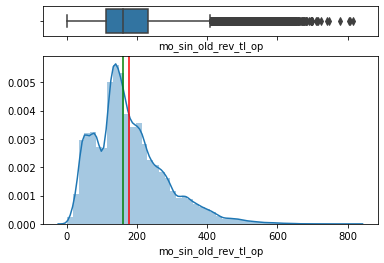

Before Transformation Skewness: 1.0044117137299393

Checking for skewness with different transformation techniques
sqrt: 0.18691319747401106
cube root: -0.10245181056099369
yeo-jhonson: -0.014482882402423791

After Transformation


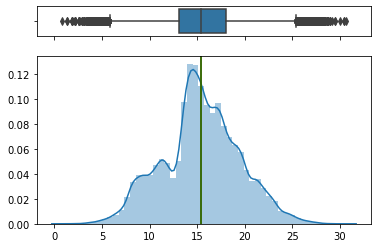

After Transformation Skewness: -0.014482882402423791
The lambda value is 0.37748769912020935
Bivariate Analysis


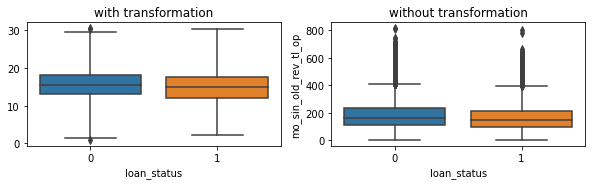

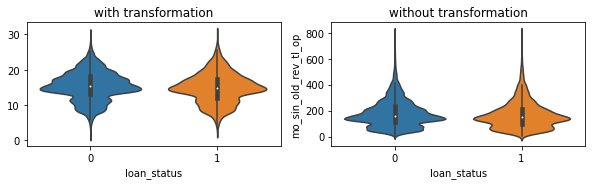


Correlation:
with transformation:
                      loan_status  mo_sin_old_rev_tl_op
loan_status              1.000000             -0.031771
mo_sin_old_rev_tl_op    -0.031771              1.000000
without transformation:
                      loan_status  mo_sin_old_rev_tl_op
loan_status              1.000000             -0.027262
mo_sin_old_rev_tl_op    -0.027262              1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=166.22199159000903, pvalue=4.947370109859527e-38)
MannwhitneyuResult(statistic=710364041.0, pvalue=4.947377999548591e-38)
With Transformation
KruskalResult(statistic=166.22199159000903, pvalue=4.947370109859527e-38)
MannwhitneyuResult(statistic=710364041.0, pvalue=4.947377999548591e-38)


In [52]:
analyze_bivariate_num_cat(df['mo_sin_old_rev_tl_op'] ,'mo_sin_old_rev_tl_op')

### Column/Attribute_ 41 : mo_sin_rcnt_rev_tl_op

Before Transformation


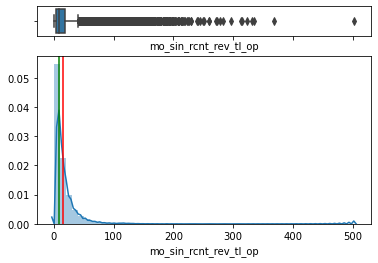

Before Transformation Skewness: 3.7404856958612087

Checking for skewness with different transformation techniques
sqrt: 1.3082823118037985
cube root: 0.5770470233438418
yeo-jhonson: 0.003614835846658

After Transformation


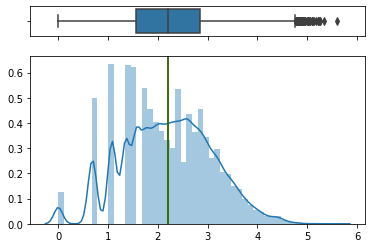

After Transformation Skewness: 0.003614835846658
The lambda value is -0.034645797425813085
Bivariate Analysis


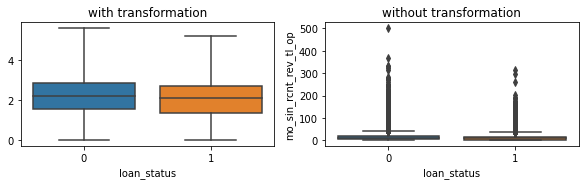

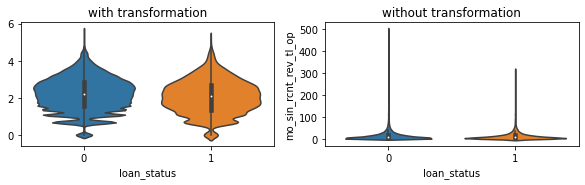


Correlation:
with transformation:
                       loan_status  mo_sin_rcnt_rev_tl_op
loan_status               1.000000              -0.039689
mo_sin_rcnt_rev_tl_op    -0.039689               1.000000
without transformation:
                       loan_status  mo_sin_rcnt_rev_tl_op
loan_status               1.000000              -0.025627
mo_sin_rcnt_rev_tl_op    -0.025627               1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=234.80426217623994, pvalue=5.341448770185449e-53)
MannwhitneyuResult(statistic=720186544.5, pvalue=5.341458886708707e-53)
With Transformation
KruskalResult(statistic=234.80426217623994, pvalue=5.341448770185449e-53)
MannwhitneyuResult(statistic=720186544.5, pvalue=5.341458886708707e-53)


In [53]:
analyze_bivariate_num_cat( df['mo_sin_rcnt_rev_tl_op'],'mo_sin_rcnt_rev_tl_op')

### Column/Attribute_ 42 : mo_sin_rcnt_tl

Before Transformation


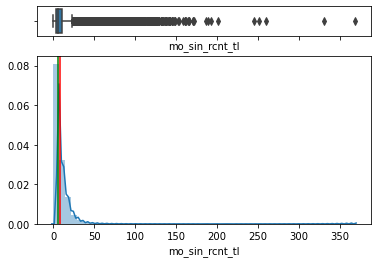

Before Transformation Skewness: 5.088484603979294

Checking for skewness with different transformation techniques
sqrt: 1.2536360492261434
cube root: 0.37930578792902
yeo-jhonson: 0.0014046194059317318

After Transformation


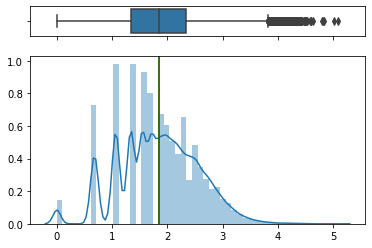

After Transformation Skewness: 0.0014046194059317318
The lambda value is -0.051479055619465384
Bivariate Analysis


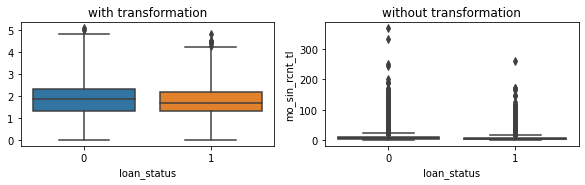

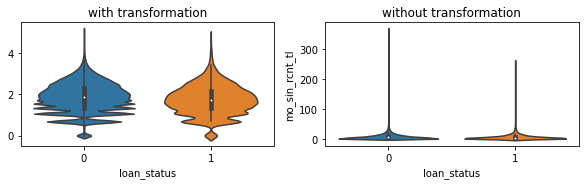


Correlation:
with transformation:
                loan_status  mo_sin_rcnt_tl
loan_status        1.000000       -0.042889
mo_sin_rcnt_tl    -0.042889        1.000000
without transformation:
                loan_status  mo_sin_rcnt_tl
loan_status        1.000000       -0.024216
mo_sin_rcnt_tl    -0.024216        1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=294.31467124576443, pvalue=5.7075797629817e-66)
MannwhitneyuResult(statistic=727533678.5, pvalue=5.707591872164105e-66)
With Transformation
KruskalResult(statistic=294.31467124576443, pvalue=5.7075797629817e-66)
MannwhitneyuResult(statistic=727533678.5, pvalue=5.707591872164105e-66)


In [54]:
analyze_bivariate_num_cat(df['mo_sin_rcnt_tl'] ,'mo_sin_rcnt_tl')

### Column/Attribute_ 43 : mort_acc

In [55]:
#ordinal

### Column/Attribute_ 44 : num_accts_ever_120_pd

In [56]:
#ordinal

### Column/Attribute_ 45 : num_actv_bc_tl

Before Transformation


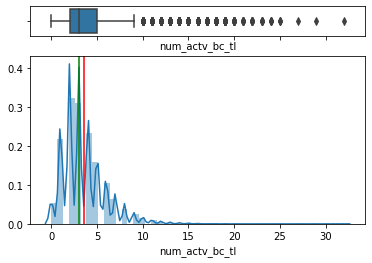

Before Transformation Skewness: 1.4765743256381214

Checking for skewness with different transformation techniques
sqrt: -0.06179284390542865
cube root: -1.1298429550007068
yeo-jhonson: 0.0034966456065040025

After Transformation


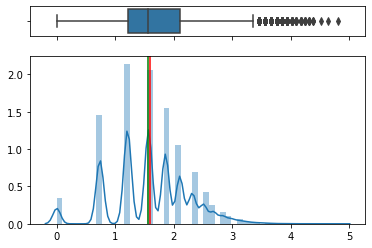

After Transformation Skewness: 0.0034966456065040025
The lambda value is 0.17412629641150942
Bivariate Analysis


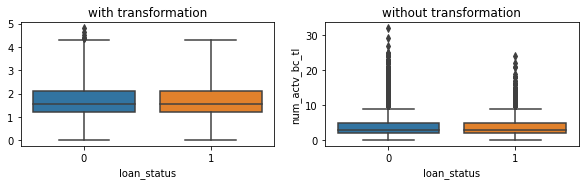

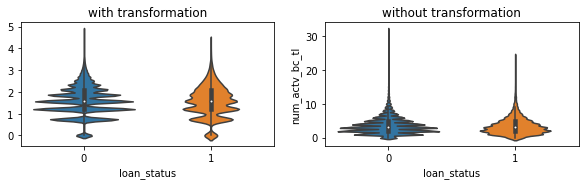


Correlation:
with transformation:
                loan_status  num_actv_bc_tl
loan_status        1.000000       -0.018663
num_actv_bc_tl    -0.018663        1.000000
without transformation:
                loan_status  num_actv_bc_tl
loan_status        1.000000       -0.013038
num_actv_bc_tl    -0.013038        1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=45.74760893418294, pvalue=1.345134438108531e-11)
MannwhitneyuResult(statistic=685110003.5, pvalue=1.3451355942155787e-11)
With Transformation
KruskalResult(statistic=45.74760893418294, pvalue=1.345134438108531e-11)
MannwhitneyuResult(statistic=685110003.5, pvalue=1.3451355942155787e-11)


In [57]:
analyze_bivariate_num_cat( df['num_actv_bc_tl'],'num_actv_bc_tl')

### Column/Attribute_ 46 : num_actv_rev_tl

Before Transformation


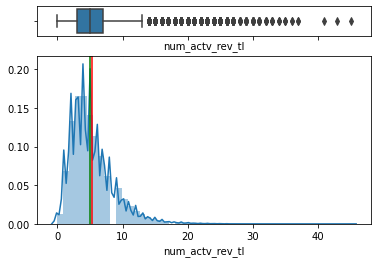

Before Transformation Skewness: 1.5689150115782424

Checking for skewness with different transformation techniques
sqrt: 0.2568167959232541
cube root: -0.5662082806927073
yeo-jhonson: 0.00460414871833936

After Transformation


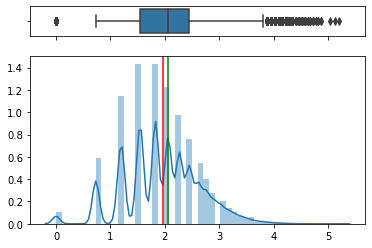

After Transformation Skewness: 0.00460414871833936
The lambda value is 0.15269258829684235
Bivariate Analysis


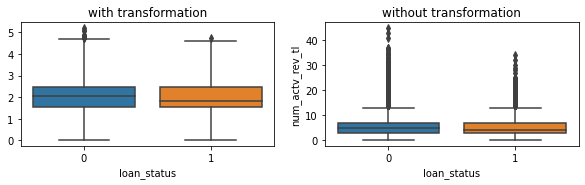

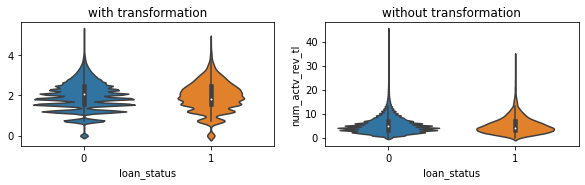


Correlation:
with transformation:
                 loan_status  num_actv_rev_tl
loan_status         1.000000        -0.009616
num_actv_rev_tl    -0.009616         1.000000
without transformation:
                 loan_status  num_actv_rev_tl
loan_status         1.000000        -0.004333
num_actv_rev_tl    -0.004333         1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=8.683678935657547, pvalue=0.0032107221927578375)
MannwhitneyuResult(statistic=669845821.0, pvalue=0.003210723477362796)
With Transformation
KruskalResult(statistic=8.683678935657547, pvalue=0.0032107221927578375)
MannwhitneyuResult(statistic=669845821.0, pvalue=0.003210723477362796)


In [58]:
analyze_bivariate_num_cat( df['num_actv_rev_tl'],'num_actv_rev_tl')

### Column/Attribute_ 47 : num_bc_sats

Before Transformation


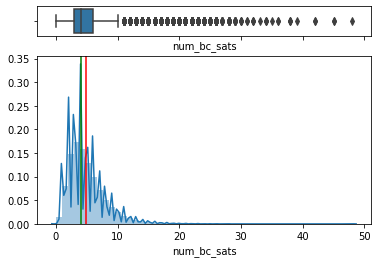

Before Transformation Skewness: 1.6801290164506633

Checking for skewness with different transformation techniques
sqrt: 0.27481534734156804
cube root: -0.5923136275654679
yeo-jhonson: 0.003923152252870278

After Transformation


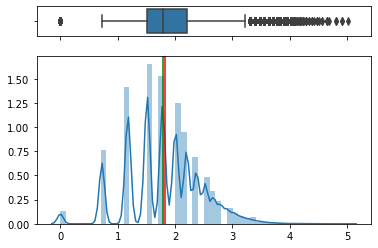

After Transformation Skewness: 0.003923152252870278
The lambda value is 0.12474886156592485
Bivariate Analysis


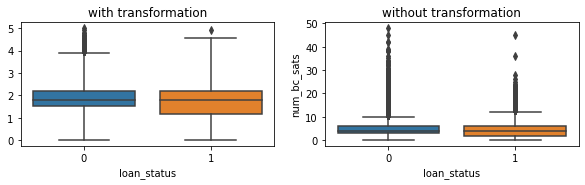

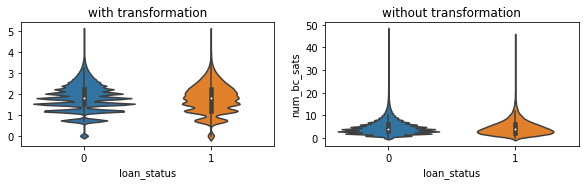


Correlation:
with transformation:
             loan_status  num_bc_sats
loan_status     1.000000    -0.018777
num_bc_sats    -0.018777     1.000000
without transformation:
             loan_status  num_bc_sats
loan_status      1.00000     -0.01347
num_bc_sats     -0.01347      1.00000

Statiscal Test:
Without Transformation
KruskalResult(statistic=45.07297379972179, pvalue=1.8982717206213984e-11)
MannwhitneyuResult(statistic=685035919.0, pvalue=1.8982733329445836e-11)
With Transformation
KruskalResult(statistic=45.07297379972179, pvalue=1.8982717206213984e-11)
MannwhitneyuResult(statistic=685035919.0, pvalue=1.8982733329445836e-11)


In [59]:
analyze_bivariate_num_cat( df['num_bc_sats']  ,'num_bc_sats')

### Column/Attribute_ 48 : num_bc_tl

Before Transformation


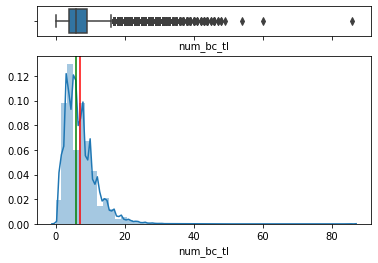

Before Transformation Skewness: 1.557366483900734

Checking for skewness with different transformation techniques
sqrt: 0.41205622168476447
cube root: -0.10841846356004622
yeo-jhonson: 0.00028112466362120785

After Transformation


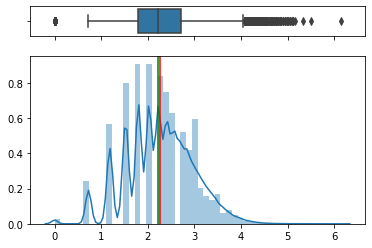

After Transformation Skewness: 0.00028112466362120785
The lambda value is 0.13563910473455515
Bivariate Analysis


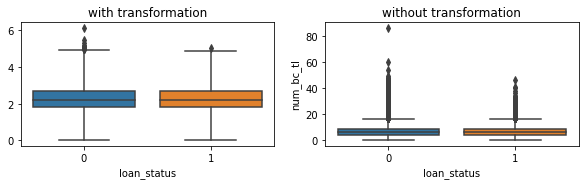

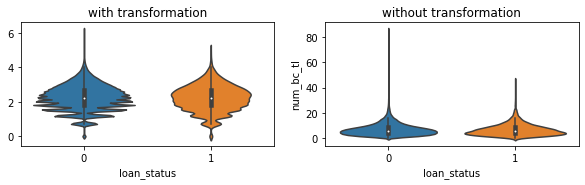


Correlation:
with transformation:
             loan_status  num_bc_tl
loan_status     1.000000  -0.017276
num_bc_tl      -0.017276   1.000000
without transformation:
             loan_status  num_bc_tl
loan_status     1.000000  -0.013172
num_bc_tl      -0.013172   1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=36.345293067301, pvalue=1.652778856972653e-09)
MannwhitneyuResult(statistic=682367324.5, pvalue=1.6527801185801003e-09)
With Transformation
KruskalResult(statistic=36.345293067301, pvalue=1.652778856972653e-09)
MannwhitneyuResult(statistic=682367324.5, pvalue=1.6527801185801003e-09)


In [60]:
analyze_bivariate_num_cat( df['num_bc_tl'] ,'num_bc_tl' )

### Column/Attribute_ 49 : num_il_tl

Before Transformation


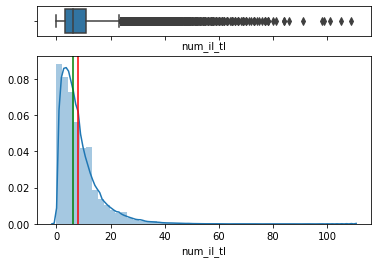

Before Transformation Skewness: 2.1711583439892674

Checking for skewness with different transformation techniques
sqrt: 0.46692084218867586
cube root: -0.4396526351523998
yeo-jhonson: -0.004706830498967454

After Transformation


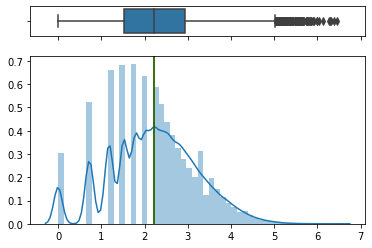

After Transformation Skewness: -0.004706830498967454
The lambda value is 0.12866675225642468
Bivariate Analysis


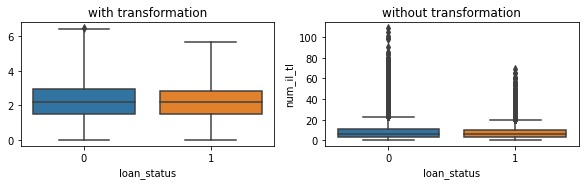

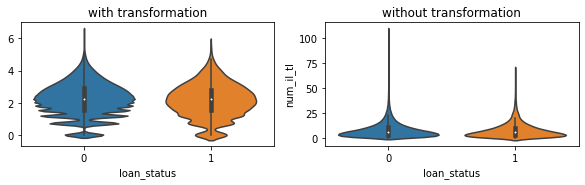


Correlation:
with transformation:
             loan_status  num_il_tl
loan_status     1.000000  -0.021021
num_il_tl      -0.021021   1.000000
without transformation:
             loan_status  num_il_tl
loan_status     1.000000  -0.011844
num_il_tl      -0.011844   1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=60.408202239876715, pvalue=7.709106883325277e-15)
MannwhitneyuResult(statistic=689476889.0, pvalue=7.709114384311528e-15)
With Transformation
KruskalResult(statistic=60.408202239876715, pvalue=7.709106883325277e-15)
MannwhitneyuResult(statistic=689476889.0, pvalue=7.709114384311528e-15)


In [61]:
analyze_bivariate_num_cat( df['num_il_tl']  ,'num_il_tl')

### Column/Attribute_ 50 : num_op_rev_tl

Before Transformation


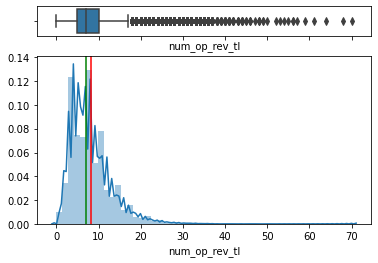

Before Transformation Skewness: 1.5557732945267868

Checking for skewness with different transformation techniques
sqrt: 0.508237526827138
cube root: 0.1221682382351907
yeo-jhonson: 1.4877055674892938e-06

After Transformation


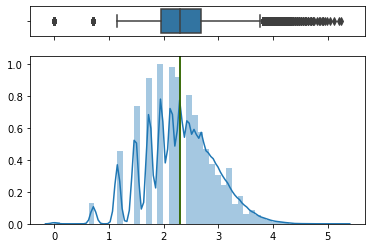

After Transformation Skewness: 1.4877055674892938e-06
The lambda value is 0.09401113313326329
Bivariate Analysis


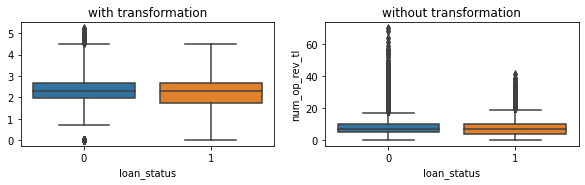

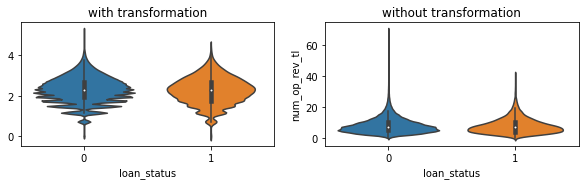


Correlation:
with transformation:
               loan_status  num_op_rev_tl
loan_status       1.000000      -0.013991
num_op_rev_tl    -0.013991       1.000000
without transformation:
               loan_status  num_op_rev_tl
loan_status       1.000000      -0.009857
num_op_rev_tl    -0.009857       1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=22.88076737863456, pvalue=1.7236794426368528e-06)
MannwhitneyuResult(statistic=677330185.5, pvalue=1.7236805007243727e-06)
With Transformation
KruskalResult(statistic=22.88076737863456, pvalue=1.7236794426368528e-06)
MannwhitneyuResult(statistic=677330185.5, pvalue=1.7236805007243727e-06)


In [62]:
analyze_bivariate_num_cat( df['num_op_rev_tl'] ,'num_op_rev_tl')

### Column/Attribute_ 51 : num_rev_accts

Before Transformation


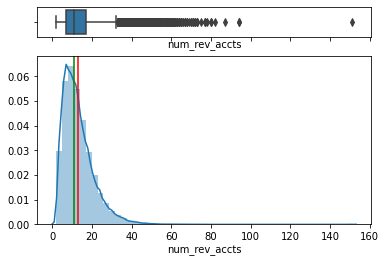

Before Transformation Skewness: 1.4981652031055022

Checking for skewness with different transformation techniques
sqrt: 0.5305818192507192
cube root: 0.242255073242008
yeo-jhonson: -0.004426854983265693

After Transformation


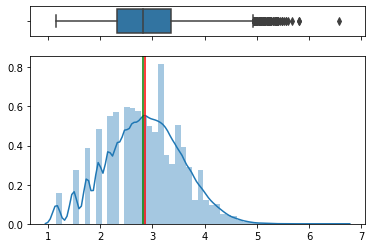

After Transformation Skewness: -0.004426854983265693
The lambda value is 0.10226726975749992
Bivariate Analysis


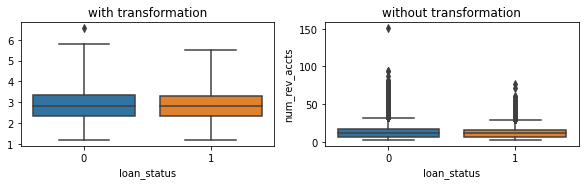

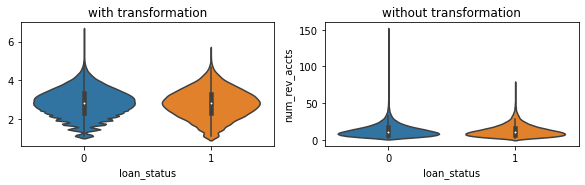


Correlation:
with transformation:
               loan_status  num_rev_accts
loan_status       1.000000      -0.013645
num_rev_accts    -0.013645       1.000000
without transformation:
               loan_status  num_rev_accts
loan_status       1.000000      -0.009188
num_rev_accts    -0.009188       1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=24.626606191657476, pvalue=6.958434658808626e-07)
MannwhitneyuResult(statistic=678094130.0, pvalue=6.958439070494524e-07)
With Transformation
KruskalResult(statistic=24.626606191657476, pvalue=6.958434658808626e-07)
MannwhitneyuResult(statistic=678094130.0, pvalue=6.958439070494524e-07)


In [63]:
analyze_bivariate_num_cat( df['num_rev_accts'] ,'num_rev_accts' )

### Column/Attribute_ 52 : num_rev_tl_bal_gt_0

Before Transformation


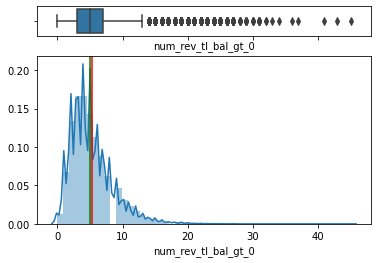

Before Transformation Skewness: 1.4885687277497368

Checking for skewness with different transformation techniques
sqrt: 0.21743993789586877
cube root: -0.6026027324300832
yeo-jhonson: 0.004293438671535826

After Transformation


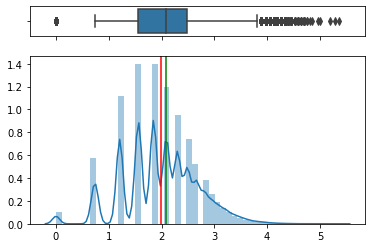

After Transformation Skewness: 0.004293438671535826
The lambda value is 0.16713182198874799
Bivariate Analysis


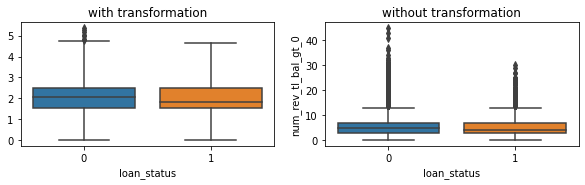

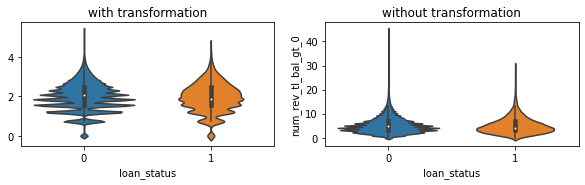


Correlation:
with transformation:
                     loan_status  num_rev_tl_bal_gt_0
loan_status             1.000000            -0.012233
num_rev_tl_bal_gt_0    -0.012233             1.000000
without transformation:
                     loan_status  num_rev_tl_bal_gt_0
loan_status             1.000000            -0.007626
num_rev_tl_bal_gt_0    -0.007626             1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=16.117065318445782, pvalue=5.954505378361115e-05)
MannwhitneyuResult(statistic=674158850.0, pvalue=5.954508502224757e-05)
With Transformation
KruskalResult(statistic=16.117065318445782, pvalue=5.954505378361115e-05)
MannwhitneyuResult(statistic=674158850.0, pvalue=5.954508502224757e-05)


In [64]:
analyze_bivariate_num_cat( df['num_rev_tl_bal_gt_0'],'num_rev_tl_bal_gt_0' )

### Column/Attribute_ 53 : num_sats

Before Transformation


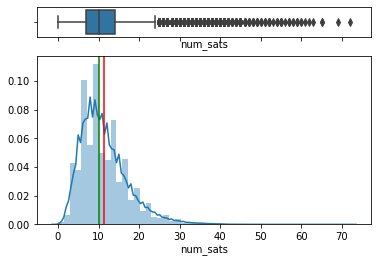

Before Transformation Skewness: 1.2900737193674137

Checking for skewness with different transformation techniques
sqrt: 0.42167959660977594
cube root: 0.13494284815694665
yeo-jhonson: 0.0018172445872623277

After Transformation


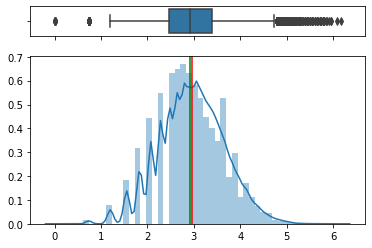

After Transformation Skewness: 0.0018172445872623277
The lambda value is 0.159582644245553
Bivariate Analysis


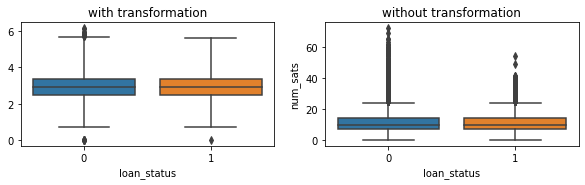

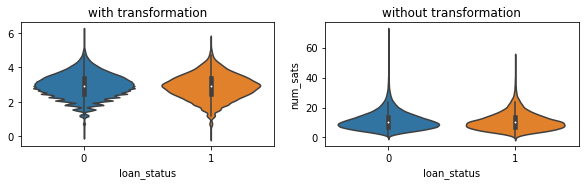


Correlation:
with transformation:
             loan_status  num_sats
loan_status     1.000000 -0.026142
num_sats       -0.026142  1.000000
without transformation:
             loan_status  num_sats
loan_status     1.000000 -0.021995
num_sats       -0.021995  1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=86.60817412934854, pvalue=1.3229919668595355e-20)
MannwhitneyuResult(statistic=695711246.5, pvalue=1.3229935006308538e-20)
With Transformation
KruskalResult(statistic=86.60817412934854, pvalue=1.3229919668595355e-20)
MannwhitneyuResult(statistic=695711246.5, pvalue=1.3229935006308538e-20)


In [65]:
analyze_bivariate_num_cat( df['num_sats'] ,'num_sats')

### Column/Attribute_ 54 : num_tl_op_past_12m

Before Transformation


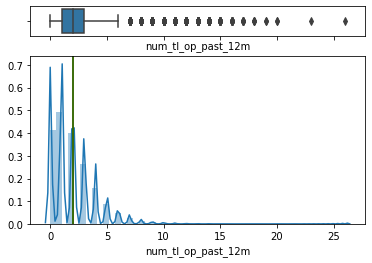

Before Transformation Skewness: 1.4844880350768266

Checking for skewness with different transformation techniques
sqrt: -0.15517714631443252
cube root: -0.7364727101701934
yeo-jhonson: -0.006500111844496189

After Transformation


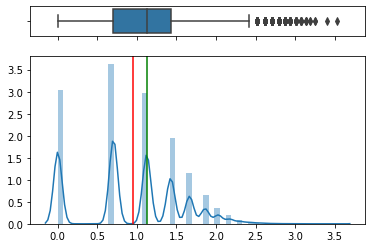

After Transformation Skewness: -0.006500111844496189
The lambda value is 0.04192053739721122
Bivariate Analysis


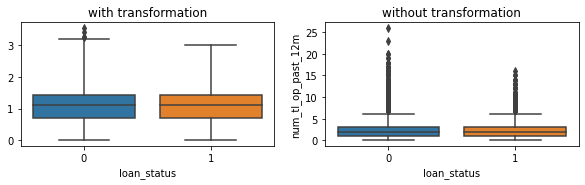

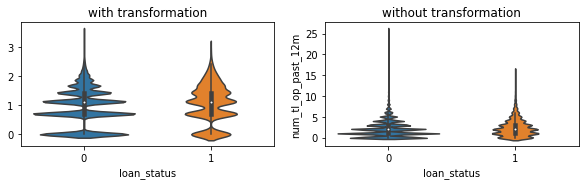


Correlation:
with transformation:
                    loan_status  num_tl_op_past_12m
loan_status             1.00000             0.04738
num_tl_op_past_12m      0.04738             1.00000
without transformation:
                    loan_status  num_tl_op_past_12m
loan_status            1.000000            0.048102
num_tl_op_past_12m     0.048102            1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=338.95161153861415, pvalue=1.0794237672147384e-75)
MannwhitneyuResult(statistic=584559017.0, pvalue=1.0794262675562408e-75)
With Transformation
KruskalResult(statistic=338.95161153861415, pvalue=1.0794237672147384e-75)
MannwhitneyuResult(statistic=584559017.0, pvalue=1.0794262675562408e-75)


In [66]:
analyze_bivariate_num_cat( df['num_tl_op_past_12m'],'num_tl_op_past_12m' )

### Column/Attribute_ 55 : pub_rec_bankruptcies

In [67]:
#ordinal

### Column/Attribute_ 56 : tot_hi_cred_lim

Before Transformation


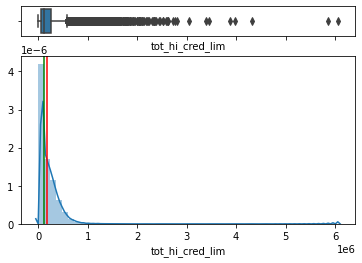

Before Transformation Skewness: 2.8456174773557015

Checking for skewness with different transformation techniques
sqrt: 0.7926132084152825
cube root: 0.39539422149405284
yeo-jhonson: -0.023013351819436388

After Transformation


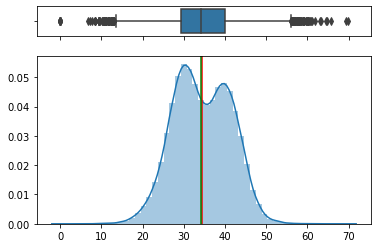

After Transformation Skewness: -0.023013351819436388
The lambda value is 0.1600059333885516
Bivariate Analysis


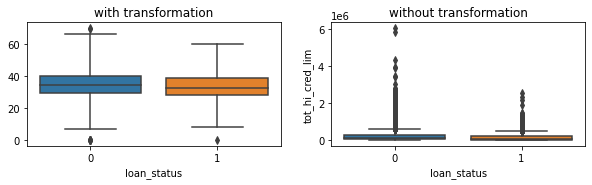

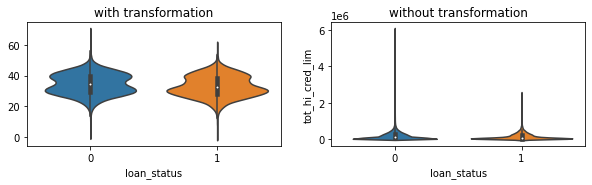


Correlation:
with transformation:
                 loan_status  tot_hi_cred_lim
loan_status          1.00000         -0.05309
tot_hi_cred_lim     -0.05309          1.00000
without transformation:
                 loan_status  tot_hi_cred_lim
loan_status           1.0000          -0.0425
tot_hi_cred_lim      -0.0425           1.0000

Statiscal Test:
Without Transformation
KruskalResult(statistic=412.9475526149017, pvalue=8.366147233313193e-92)
MannwhitneyuResult(statistic=740571049.5, pvalue=8.36616818804753e-92)
With Transformation
KruskalResult(statistic=412.9475526149017, pvalue=8.366147233313193e-92)
MannwhitneyuResult(statistic=740571049.5, pvalue=8.36616818804753e-92)


In [68]:
analyze_bivariate_num_cat( df['tot_hi_cred_lim'],'tot_hi_cred_lim')

### Column/Attribute_ 57 : total_bal_ex_mort

Before Transformation


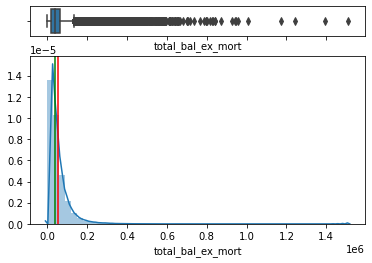

Before Transformation Skewness: 3.7351105377447285

Checking for skewness with different transformation techniques
sqrt: 1.035375299016381
cube root: 0.36294547885117145
yeo-jhonson: 0.07770276699594238

After Transformation


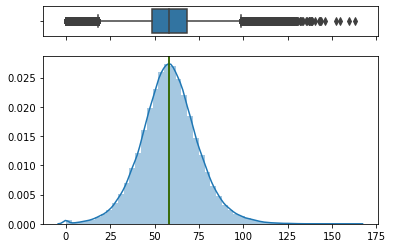

After Transformation Skewness: 0.07770276699594238
The lambda value is 0.2666459858796582
Bivariate Analysis


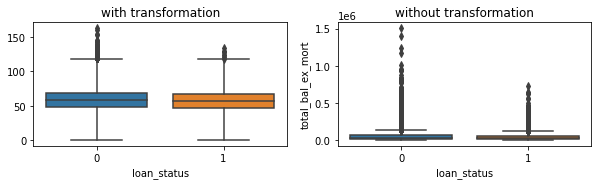

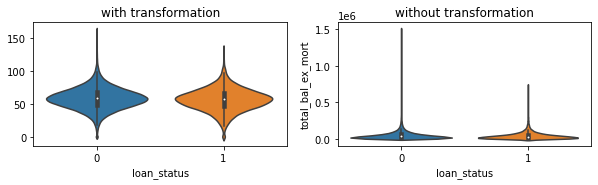


Correlation:
with transformation:
                   loan_status  total_bal_ex_mort
loan_status           1.000000          -0.027253
total_bal_ex_mort    -0.027253           1.000000
without transformation:
                   loan_status  total_bal_ex_mort
loan_status           1.000000          -0.017672
total_bal_ex_mort    -0.017672           1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=88.10204458287797, pvalue=6.2163339778842326e-21)
MannwhitneyuResult(statistic=696105885.5, pvalue=6.216341231918329e-21)
With Transformation
KruskalResult(statistic=88.10204458287797, pvalue=6.2163339778842326e-21)
MannwhitneyuResult(statistic=696105885.5, pvalue=6.216341231918329e-21)


In [69]:
analyze_bivariate_num_cat( df['total_bal_ex_mort'] ,'total_bal_ex_mort')

### Column/Attribute_ 58 : total_bc_limit

Before Transformation


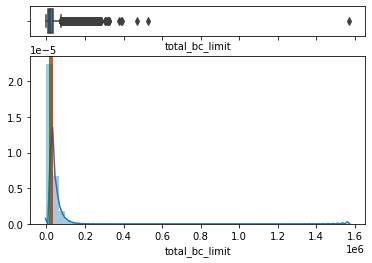

Before Transformation Skewness: 3.7724693413839123

Checking for skewness with different transformation techniques
sqrt: 0.7622978190492348
cube root: 0.07031229197049432
yeo-jhonson: 0.05388625833462723

After Transformation


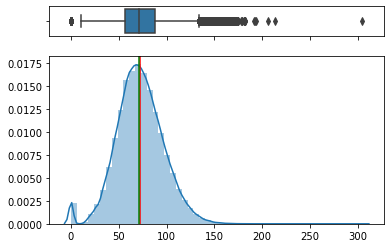

After Transformation Skewness: 0.05388625833462723
The lambda value is 0.3223444693661599
Bivariate Analysis


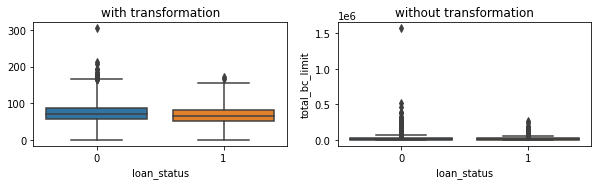

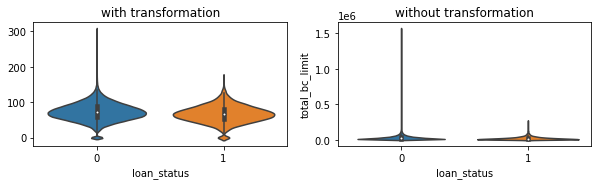


Correlation:
with transformation:
                loan_status  total_bc_limit
loan_status        1.000000       -0.056766
total_bc_limit    -0.056766        1.000000
without transformation:
                loan_status  total_bc_limit
loan_status        1.000000       -0.048682
total_bc_limit    -0.048682        1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=485.60758971324145, pvalue=1.286942855128156e-107)
MannwhitneyuResult(statistic=747546060.5, pvalue=1.2869463493787807e-107)
With Transformation
KruskalResult(statistic=485.60758971324145, pvalue=1.286942855128156e-107)
MannwhitneyuResult(statistic=747546060.5, pvalue=1.2869463493787807e-107)


In [70]:
analyze_bivariate_num_cat(df['total_bc_limit'] ,'total_bc_limit')

### Column/Attribute_ 59 : total_il_high_credit_limit

Before Transformation


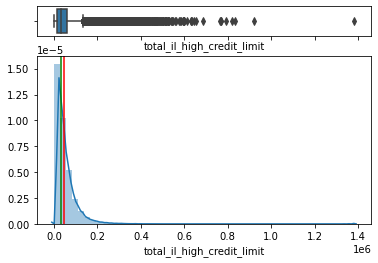

Before Transformation Skewness: 2.9025364462962373

Checking for skewness with different transformation techniques
sqrt: 0.31226017214982177
cube root: -0.5983409908267309
yeo-jhonson: -0.524585159974896

After Transformation


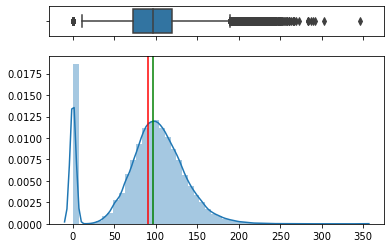

After Transformation Skewness: -0.524585159974896
The lambda value is 0.33740616702202536
Bivariate Analysis


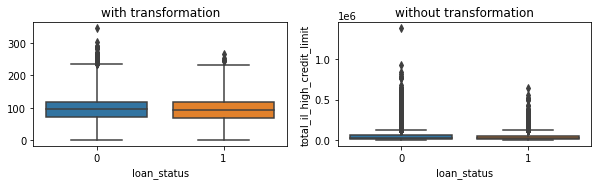

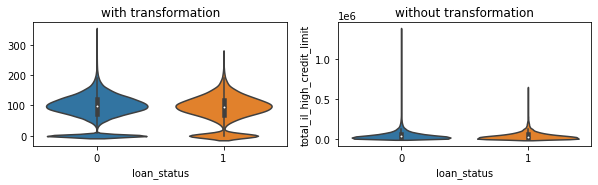


Correlation:
with transformation:
                            loan_status  total_il_high_credit_limit
loan_status                    1.000000                   -0.022263
total_il_high_credit_limit    -0.022263                    1.000000
without transformation:
                            loan_status  total_il_high_credit_limit
loan_status                    1.000000                   -0.016489
total_il_high_credit_limit    -0.016489                    1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=73.7875423307374, pvalue=8.699389918188156e-18)
MannwhitneyuResult(statistic=692830073.0, pvalue=8.69939923791996e-18)
With Transformation
KruskalResult(statistic=73.7875423307374, pvalue=8.699389918188156e-18)
MannwhitneyuResult(statistic=692830073.0, pvalue=8.69939923791996e-18)


In [71]:
analyze_bivariate_num_cat( df['total_il_high_credit_limit'],'total_il_high_credit_limit' )

### Column/Attribute_ 60 :  disbursement_method

Statistical test used: Chi_2 contingency
pvalue: 5.939660726154495e-34
The attributes: disbursement_method is dependent on loan_status

BIVARIATE PLOTS: loan_status Vs disbursement_method


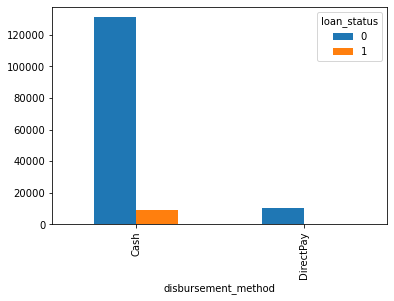

In [72]:
analyze_bivariate_cat_cat('disbursement_method')

In [73]:
dft.to_excel('transformed_df.xlsx')